In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def runge_kutta_step(f, y, r, h, a, t, b):
    k1 = h * f(y, r, a, t, b)
    k2 = h * f(y + 0.5 * k1, r + 0.5 * h, a, t, b)
    k3 = h * f(y + 0.5 * k2, r + 0.5 * h, a, t, b)
    k4 = h * f(y + k3, r + h, a, t, b)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

Non-relativistic case

In [3]:
def system_newt(y, r, a, t, b):
    P, M = y
    dPdr = -(a * P**t * M) / (r**2)
    dMdr = b * r**2 * P**t
    return np.array([dPdr, dMdr])

In [4]:
def system_tov(y, r, a, t, b):
    P, M = y[0],y[1]
    K=1.914
    dPdr = -((a * P**t * M) / (r**2)) * (1+P*K**t/pow(P,t)) * (1 + 4*np.pi*pow(r,3)*0.08969*P/M) * pow((1-2*K**t*M/r),-1)
    dMdr = b * r**2 * P**t
    return np.array([dPdr, dMdr])

In [5]:
# Define the constants
a_nrel = 1  # Replace with your value
t_nrel = 3/5  # Replace with your value
b_nrel = 0.7636  # Replace with your value

# Initialize the reuired values
h = 0.0001 # step size
r=1e-25 # choosing an arbitrarily small value of r to avoid illegal calculations

# Define the initial conditions
P_nrel0 = 1e-4
M_nrel0 = 1/3*P_nrel0*r**3
y1_nrel0 = np.array([P_nrel0, M_nrel0]) # for newtonian
y2_nrel0 = np.array([P_nrel0, M_nrel0]) # for TOV

p1=P_nrel0 # Iterated pressure initialization
p2=P_nrel0
m=M_nrel0 # Iterated mass initialization
i=0 # iteration

# Initialize arrays to store solutions
P1_nrel_sol = [P_nrel0]
M1_nrel_sol = [M_nrel0]
r1_values   = [r]
P2_nrel_sol = [P_nrel0]
M2_nrel_sol = [M_nrel0]
r2_values   = [r]

# Perform Runge-Kutta integration(f, y, r, h, a, t, b)#(y, r, a, t, b)
while p1 > 0:
    r+=h;r1_values.append(r)
    y1_nrel0 = runge_kutta_step(system_newt, y1_nrel0, r1_values[i], h, a_nrel, t_nrel, b_nrel)
    p1, m = y1_nrel0
    P1_nrel_sol.append(p1); M1_nrel_sol.append(m)
    i+=1

r=1e-25;i=0
while p2 > 0 :
    r+=h;r2_values.append(r)
    y2_nrel0 = runge_kutta_step(system_tov, y2_nrel0, r2_values[i], h, a_nrel, t_nrel, b_nrel)
    p2, m = y2_nrel0
    P2_nrel_sol.append(p2); M2_nrel_sol.append(m)
    i+=1
 
print('Newtonian')
print(r1_values[len(M1_nrel_sol)-2])
print(M1_nrel_sol[len(M1_nrel_sol)-2])

print("Full TOV")
print(r2_values[len(M2_nrel_sol)-2])
print(M2_nrel_sol[len(M2_nrel_sol)-2])

/tmp/ipykernel_6308/1806200080.py:3: RuntimeWarning: invalid value encountered in double_scalars
  dPdr = -(a * P**t * M) / (r**2)
/tmp/ipykernel_6308/1806200080.py:4: RuntimeWarning: invalid value encountered in double_scalars
  dMdr = b * r**2 * P**t


Newtonian
16.606299999974638
0.774632504770632
Full TOV
15.347099999977571
0.6024723525705252


/tmp/ipykernel_6308/2481059924.py:5: RuntimeWarning: invalid value encountered in double_scalars
  dMdr = b * r**2 * P**t


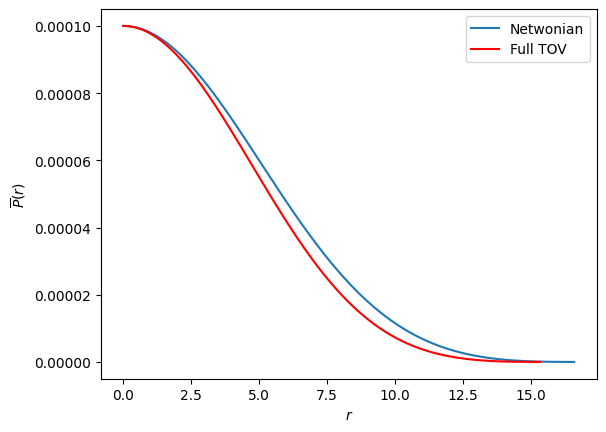

In [7]:
# Plot the results
plt.plot(r1_values, P1_nrel_sol, label='Netwonian' )
plt.plot(r2_values, P2_nrel_sol, label='Full TOV', color = "red")
plt.xlabel('$r$')
plt.ylabel('$\overline {P}(r)$')
plt.legend()
plt.show()

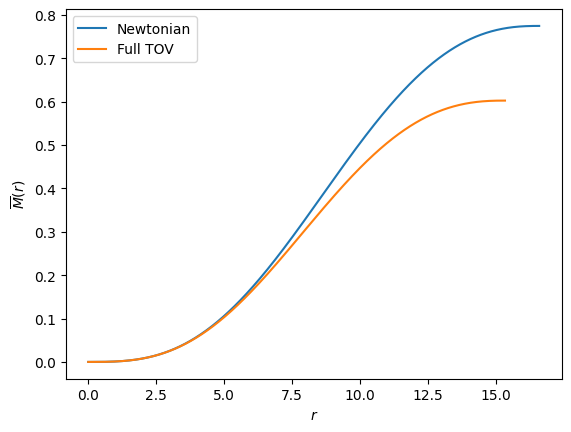

In [8]:
plt.plot(r1_values, M1_nrel_sol, label='Newtonian')
plt.plot(r2_values, M2_nrel_sol, label='Full TOV')
plt.xlabel('$r$')
plt.ylabel('$\overline {M}(r)$')
plt.legend()
plt.show()

Relativistic case

In [9]:
# Define the simplified system of ODEs
def system_newt2(y, r, a, b):
    P, M = y
    dPdr = -(a * P * M) / r**2
    dMdr = b * r**2 * P
    return [dPdr, dMdr]

In [10]:
# Define the system of ODEs
def system_tov2(y, r, a, b, K):
    P, M = y
    dPdr = -(a * P * M / r**2) * (1 + K) * (1 + 4 * np.pi * r**3 * 0.08969 * P / M) * (1 - 2 * a * K * M / r)**-1
    dMdr = b * r**2 * P
    return [dPdr, dMdr]
    #return np.array([dPdr, dMdr])

Pressure and mass: Full TOV

In [11]:
# Define constants
a = 4.428
b = 3.374
K = 1/3

# Define initial conditions
P0 = 1e-4
M0 = (1/3) * P0 * 1e-5**3  # Assuming an arbitrarily small value of r for initialization
y0 = [P0, M0]

# Define the range of r values
r_values = np.linspace(1e-5, 20, 10000)

# Solve the system of ODEs using odeint
solution = odeint(system_tov2, y0, r_values, args=(a, b, K))

# Extract P and M values from the solution
P_solution, M_solution = solution[:, 0], solution[:, 1]

print(P_solution[len(P_solution)-1])


7.746271343178152e-05


Pressure and mass : Newtonian

In [12]:
# Define initial conditions
P0 = 1e-4
M0 = (1/3) * P0 * 1e-5**3  # Assuming an arbitrarily small value of r for initialization
y0 = [P0, M0]

# Define the range of r values
r_values2 = np.linspace(1e-5, 20, 10000)

# Solve the system of ODEs using odeint
solution2 = odeint(system_newt2, y0, r_values2, args=(a, b))

# Extract P and M values from the solution
P_solution2, M_solution2 = solution2[:, 0], solution2[:, 1]

print(M_solution2[len(M_solution2)-1])

0.8488622386600659


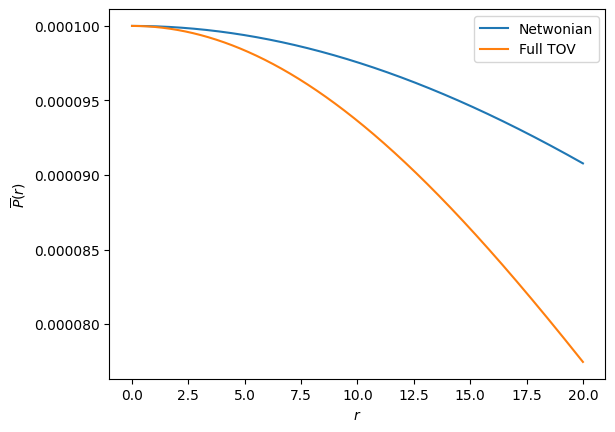

In [13]:
# Plot the results
plt.plot(r_values2, P_solution2, label='Netwonian' )
plt.plot(r_values, P_solution, label='Full TOV' )
#plt.scatter(r2_values, P2_rel_sol, label='Full TOV', s=1, color = "red")
plt.xlabel('$r$')
plt.ylabel('$\overline {P}(r)$')
plt.legend()
plt.show()

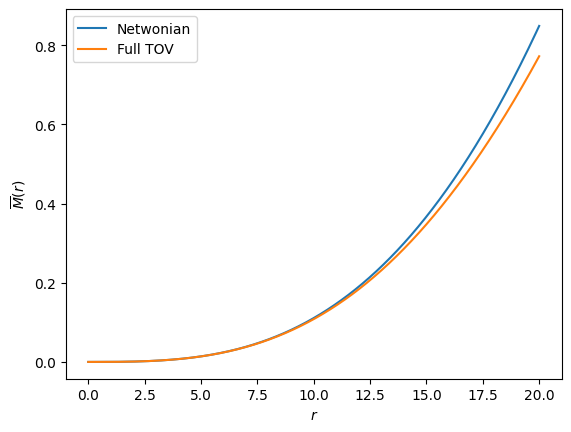

In [14]:
# Plot the results
plt.plot(r_values2, M_solution2, label='Netwonian' )
plt.plot(r_values, M_solution, label='Full TOV' )
#plt.scatter(r2_values, P2_rel_sol, label='Full TOV', s=1, color = "red")
plt.xlabel('$r$')
plt.ylabel('$\overline {M}(r)$')
plt.legend()
plt.show()

Arbitrary relativity

Fermi Model Equations of state for Pure Neutron Stars

In [15]:
epsilon = 5.346 * 10**36
x=np.linspace(0,2,100000)
E = ((2 * x**3 + x) * np.sqrt(1 + x**2) - np.arcsinh(x) + 2.15*x**3) * (epsilon/8)
P = ((2 * x**3 - 3 * x) * np.sqrt(1 + x**2) + 3 * np.arcsinh(x)) * (epsilon/24)

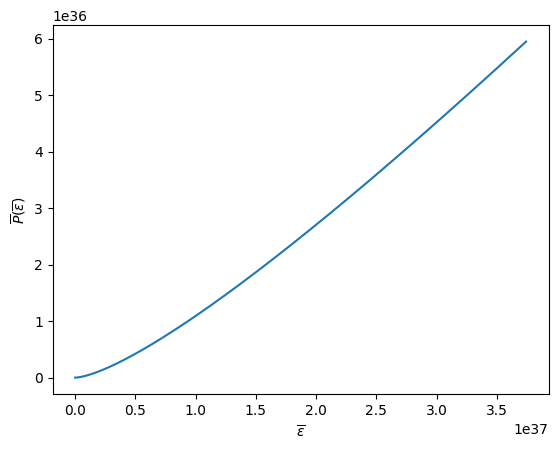

In [18]:
# Customize the plot
plt.ylabel('$\overline {P}(\overline {\epsilon})$')
plt.xlabel('$\overline {\epsilon}$')

# Show the plot
plt.plot(E,P)
plt.show()

In [ ]:
# Define the power law equation
def custom_curve(x, a1, a2):
    return a1 * x**(5/3) + a2 * x**(1)

# Generate example data
x_data = P
y_data = E #P

# Fit the curve with adjusted initial guesses
params, _ = curve_fit(custom_curve, E, P, maxfev = 10000)#, p0=(2.42, 2))

# Extract fitted parameters
a1, a2 = params

# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a1)
print("b =", a2)

# Generate fitted curve
E_fit = custom_curve(E, a1, a2)

In [ ]:
plt.plot(E, P)
plt.plot(E, E_fit, label="fit")
plt.legend()
plt.show()

In [ ]:
def density_interp():
    return 0

In [ ]:
# Define the simplified system of ODEs
def system_newt2(y, r, a, b):
    P, M = y
    dPdr = -(a * P * M) / r**2
    dMdr = b * r**2 * P
    return [dPdr, dMdr]

In [ ]:
# Define the system of ODEs
def system_tov2(y, r, a, b, K):
    P, M = y
    dPdr = -(a * P * M / r**2) * (1 + K) * (1 + 4 * np.pi * r**3 * 0.08969 * P / M) * (1 - 2 * a * K * M / r)**-1
    dMdr = b * r**2 * P
    return [dPdr, dMdr]

In [ ]:
#Solving Newtonian

a = 
b = 

In [ ]:
#Solving full TOV

In [ ]:
#Pressure profile

In [ ]:
#Mass profile M(r)

In [ ]:
#Mass and Radius M(R) values profile with central pressure as the common parameter